# Lecture M2c: Logistic Regression

In [2]:
library(MASS)
library(ISLR)
library(ggplot2)
library("RColorBrewer")

## Binomial case with single predictor

In [3]:
?Default
summary(Default)
write.csv(Default,'Default.csv')

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

Default {ISLR},R Documentation


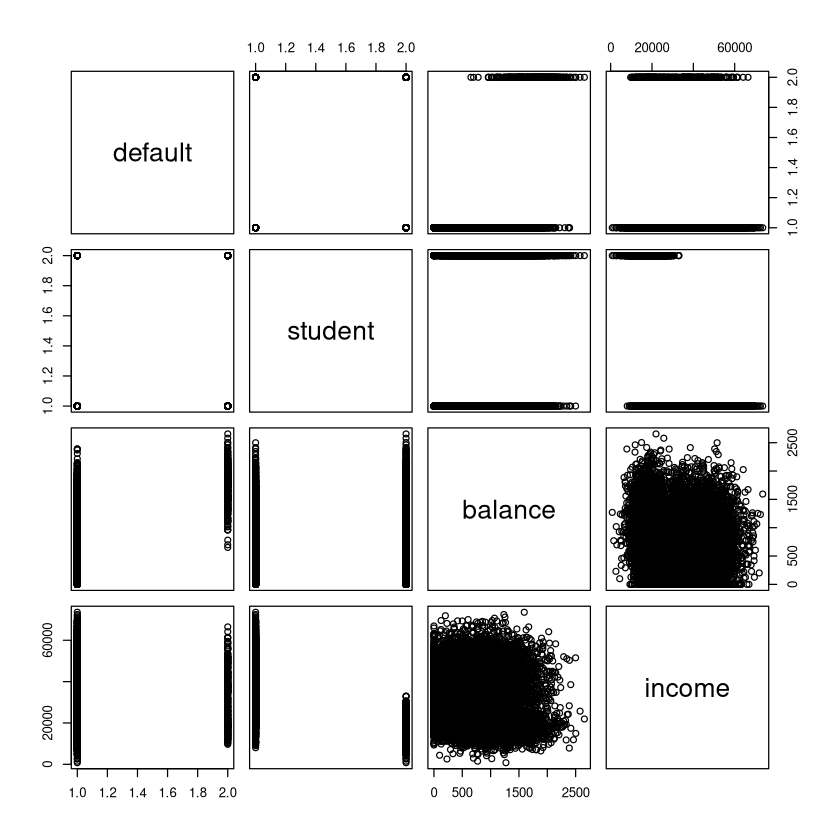

In [12]:
plot(Default)

In [13]:
col.pal <- palette( brewer.pal(n = 3, name ='Set2'))
options(repr.plot.width=4, repr.plot.height=4)
png('images/default-balance.png',height = 6,width=6,units="in",res=360)
#levels(Default$default)[1]<-"0"
#levels(Default$default)[2]<-"1"
plot(Default$balance, Default$default, col = Default$default, xlab="Balance ($)",ylab="Default (1 = No, 2 = Yes)",main="Default (binary variable) as a function of Balance") 
dev.off()

png 
  2

In [5]:
col.pal <- palette( brewer.pal(n = 3, name ='Set2'))
png('images/income-balance.png',height = 6,width=6,units="in",res=360)
options(repr.plot.width=6, repr.plot.height=6)
plot(Default$balance, Default$income, col = Default$default, xlab="Balance ($)",ylab="Income ($)",main="Income vs. Balance")
legend("topright", inset=.02, title="Default",
   c("No","Yes"), pch=1,col=col.pal, horiz=FALSE, cex=0.9)
#For pch symbol list, see: http://www.endmemo.com/program/R/pchsymbols.php
dev.off()

png 
  2

In [23]:
glm.fit1 = glm(default ~ balance,data = Default,family=binomial)
summary(glm.fit1)
coef(glm.fit1)
summary(glm.fit1)$coef
contrasts(Default$default)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


(Intercept)       balance 
-10.651330614   0.005498917

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.651330614,0.3611573721,-29.49221,3.623124e-191
balance,0.005498917,0.0002203702,24.95309,1.976602e-137


,Yes
No,0
Yes,1


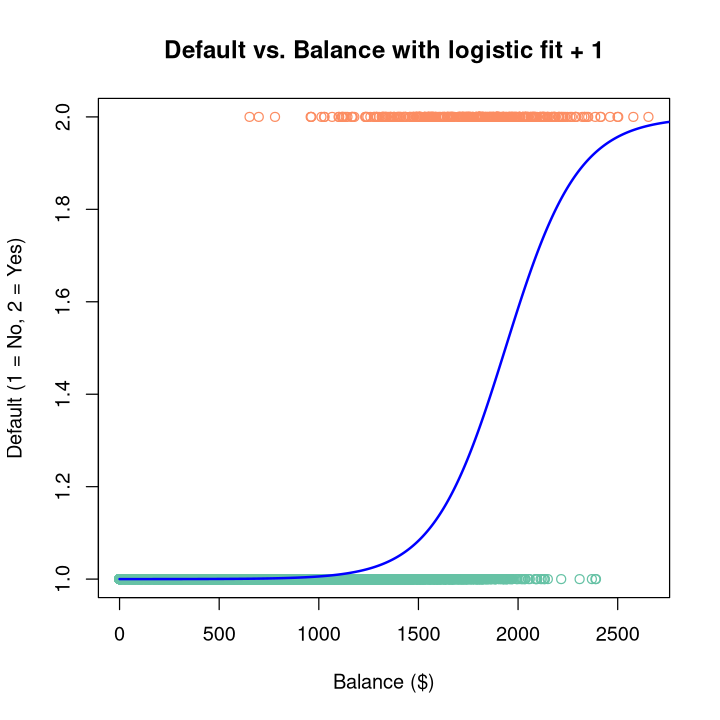

In [20]:
# You can make nice plots with ggplot2
#png('images/income-balance-model.png',height = 6,width=6,units="in",res=360)
plot(Default$balance, Default$default, col = Default$default,xlab="Balance ($)",ylab="Default (1 = No, 2 = Yes)",main="Default vs. Balance with logistic fit + 1") 
#qplot(balance, default, shape = default, data = Default)
xs <- seq(0,3000,1)
ys <- predict(glm.fit1, list(balance = xs), type="response") + 1
lines(xs,ys,lw=2,col='blue')
#dev.off()

In [22]:
glm.fit2 = glm(default ~ balance + student,data = Default,family=binomial)